In [1]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
import pandas as pd

# Baseline

In [2]:
# Training settings

batch_size = 64

# MNIST Dataset
train_dataset = datasets.MNIST(root='./data/',
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)

test_dataset = datasets.MNIST(root='./data/',
                              train=False,
                              transform=transforms.ToTensor())

# Data Loader (Input Pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [8]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.conv1 = nn.Conv2d(1, 10, kernel_size = 5)
    self.conv2 = nn.Conv2d(10, 20, kernel_size = 5)
    self.mp = nn.MaxPool2d(2)
    self.fc = nn.Linear(320, 10) 

  # Input : 28*28, channel=1
  # Conv(kernel:5) : 24*24, channel=10
  # MaxPool : 12*12, channel=10 
  # Conv(kernel:5) : 8*8, channel=20
  # MaxPool : 4*4, channel=20
  # Output : 4*4*20 = 320

  def forward(self, x):
    in_size = x.size(0)
    x = F.relu(self.mp(self.conv1(x)))
    x = F.relu(self.mp(self.conv2(x)))
    x = x.view(in_size, -1)
    x = self.fc(x)
    return F.log_softmax(x)

In [9]:
model = Net()
optimizer = optim.SGD(model.parameters(), lr = 0.01, momentum = 0.5)

In [10]:
def train(epoch):
  model.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    data, target = Variable(data), Variable(target)
    optimizer.zero_grad()
    output = model(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % 10 == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
          epoch, batch_idx * len(data), len(train_loader.dataset),
          100. * batch_idx / len(train_loader), loss.item()))

In [11]:
def test():
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        output = model(data)
        test_loss += F.nll_loss(output, target, size_average=False).data # nll_loss?? / cross entropy loss와의 관계 확인!
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

# nll_loss ???


In [12]:
for epoch in range(1, 10):
    train(epoch)
    test()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  from ipykernel import kernelapp as app


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.292448
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.301063
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.306853
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.300318
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.277487
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.279910
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.263772
Train Epoch: 1 [4480/60000 (7%)]	Loss: 2.265942
Train Epoch: 1 [5120/60000 (9%)]	Loss: 2.238816
Train Epoch: 1 [5760/60000 (10%)]	Loss: 2.205983
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.191165
Train Epoch: 1 [7040/60000 (12%)]	Loss: 2.161091
Train Epoch: 1 [7680/60000 (13%)]	Loss: 2.097830
Train Epoch: 1 [8320/60000 (14%)]	Loss: 2.021124
Train Epoch: 1 [8960/60000 (15%)]	Loss: 1.905852
Train Epoch: 1 [9600/60000 (16%)]	Loss: 1.903064
Train Epoch: 1 [10240/60000 (17%)]	Loss: 1.525404
Train Epoch: 1 [10880/60000 (18%)]	Loss: 1.233839
Train Epoch: 1 [11520/60000 (19%)]	Loss: 1.035472
Train Epoch: 1 [12160/60000 (20%)]	Loss: 0.871734
Train Epoch: 1 [12800/60000 (

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  
/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Average loss: 0.1654, Accuracy: 9532/10000 (95%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.116883
Train Epoch: 2 [640/60000 (1%)]	Loss: 0.248299
Train Epoch: 2 [1280/60000 (2%)]	Loss: 0.189614
Train Epoch: 2 [1920/60000 (3%)]	Loss: 0.183016
Train Epoch: 2 [2560/60000 (4%)]	Loss: 0.151896
Train Epoch: 2 [3200/60000 (5%)]	Loss: 0.083251
Train Epoch: 2 [3840/60000 (6%)]	Loss: 0.184110
Train Epoch: 2 [4480/60000 (7%)]	Loss: 0.142294
Train Epoch: 2 [5120/60000 (9%)]	Loss: 0.180555
Train Epoch: 2 [5760/60000 (10%)]	Loss: 0.256656
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.269599
Train Epoch: 2 [7040/60000 (12%)]	Loss: 0.233446
Train Epoch: 2 [7680/60000 (13%)]	Loss: 0.153929
Train Epoch: 2 [8320/60000 (14%)]	Loss: 0.248120
Train Epoch: 2 [8960/60000 (15%)]	Loss: 0.106276
Train Epoch: 2 [9600/60000 (16%)]	Loss: 0.106838
Train Epoch: 2 [10240/60000 (17%)]	Loss: 0.107383
Train Epoch: 2 [10880/60000 (18%)]	Loss: 0.141878
Train Epoch: 2 [11520/60000 (19%)]	Loss: 0.159688
Train Epoch: 2 [12

## Task 1 : 
위 베이스라인 구조를 아래와 같은 형태로 변경 + MNIST 데이터셋 (위 베이스라인에서 사용한 데이터셋)

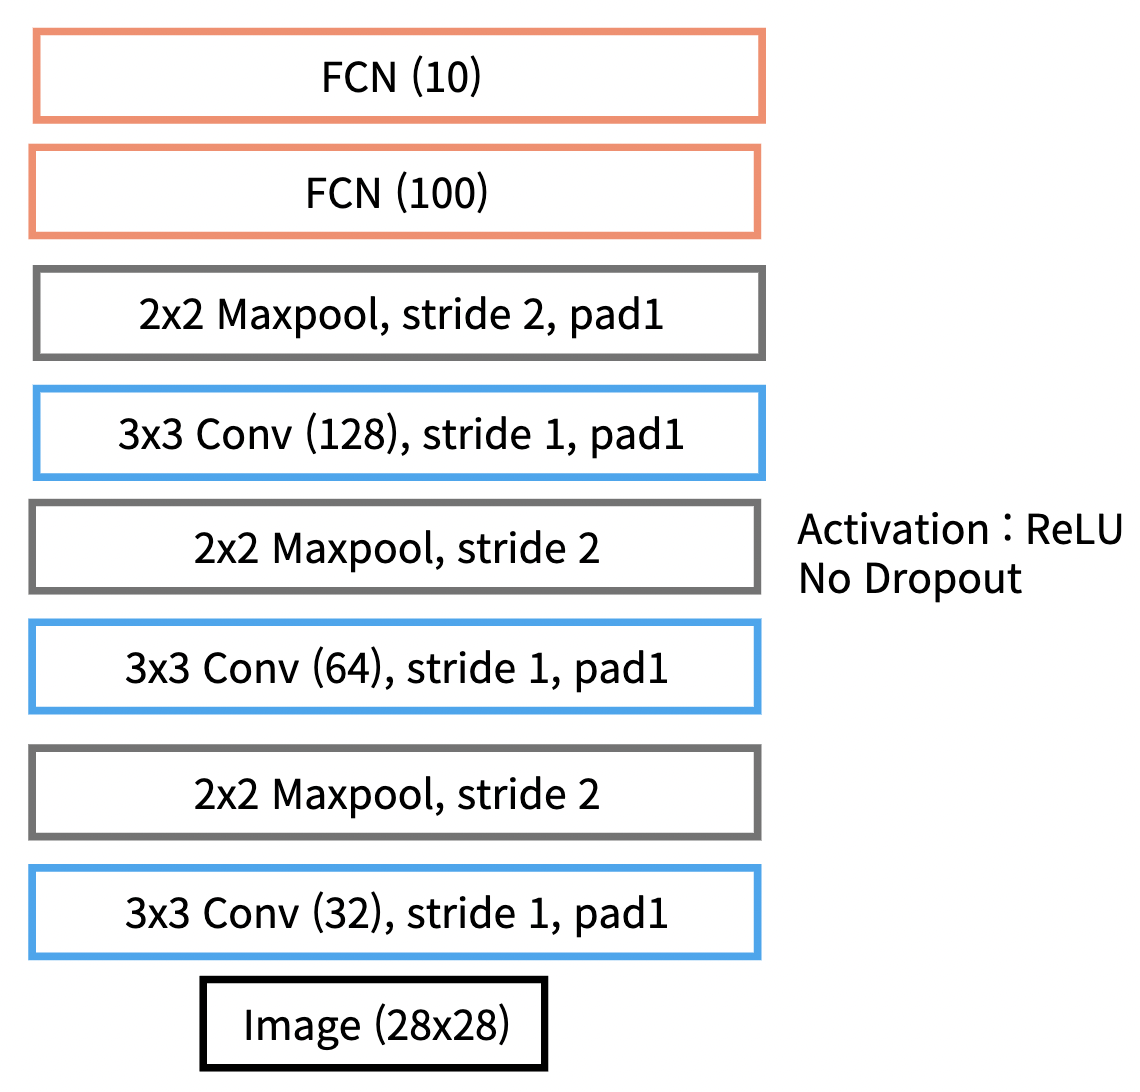

In [27]:
from torch._C import FileCheck
class revised_Net(nn.Module):
  def __init__(self):
    super(revised_Net, self).__init__()
    self.model = nn.Sequential(
        nn.Conv2d(1, 32, kernel_size = 3, stride=1, padding=1, padding_mode='zeros'), # 28
        nn.MaxPool2d(kernel_size=2, stride=2), # 14
        nn.ReLU(),

        nn.Conv2d(32, 64, kernel_size = 3, stride=1, padding=1, padding_mode='zeros'),  # 14
        nn.MaxPool2d(kernel_size=2, stride=2), # 7
        nn.ReLU(),

        nn.Conv2d(64, 128, kernel_size = 3, stride=1, padding=1, padding_mode='zeros'),# 7 
        nn.MaxPool2d(kernel_size=2, stride=2, padding=1), # 4
        nn.ReLU(),

        nn.Flatten(),  # 4*4*128
        nn.Linear(2048,100),
        nn.Linear(100, 10)
    )


  def forward(self, x):
    in_size = x.size(0)
    output = self.model(x)
    return F.log_softmax(output)


In [28]:
model = revised_Net()
optimizer = optim.SGD(model.parameters(), lr = 0.01, momentum = 0.5)

def train(epoch):
  model.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    data, target = Variable(data), Variable(target)
    optimizer.zero_grad()
    output = model(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % 10 == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
          epoch, batch_idx * len(data), len(train_loader.dataset),
          100. * batch_idx / len(train_loader), loss.item()))
      
def test():
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        output = model(data)
        test_loss += F.nll_loss(output, target, size_average=False).data # nll_loss?? / cross entropy loss와의 관계 확인!
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [29]:
for epoch in range(1, 10):
    train(epoch)
    test()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.305589
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.308203
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.291858
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.310804
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.291259
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.290460
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.296559
Train Epoch: 1 [4480/60000 (7%)]	Loss: 2.294218
Train Epoch: 1 [5120/60000 (9%)]	Loss: 2.306721
Train Epoch: 1 [5760/60000 (10%)]	Loss: 2.289464
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.287123
Train Epoch: 1 [7040/60000 (12%)]	Loss: 2.278843
Train Epoch: 1 [7680/60000 (13%)]	Loss: 2.291087
Train Epoch: 1 [8320/60000 (14%)]	Loss: 2.284059
Train Epoch: 1 [8960/60000 (15%)]	Loss: 2.282158
Train Epoch: 1 [9600/60000 (16%)]	Loss: 2.299646
Train Epoch: 1 [10240/60000 (17%)]	Loss: 2.276121
Train Epoch: 1 [10880/60000 (18%)]	Loss: 2.278359
Train Epoch: 1 [11520/60000 (19%)]	Loss: 2.278220
Train Epoch: 1 [12160/60000 (20%)]	Loss: 2.277975
Train Epoch: 1 [12800/60000 (

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Average loss: 0.2287, Accuracy: 9295/10000 (93%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.578752
Train Epoch: 2 [640/60000 (1%)]	Loss: 0.246415
Train Epoch: 2 [1280/60000 (2%)]	Loss: 0.145506
Train Epoch: 2 [1920/60000 (3%)]	Loss: 0.100505
Train Epoch: 2 [2560/60000 (4%)]	Loss: 0.220920
Train Epoch: 2 [3200/60000 (5%)]	Loss: 0.452493
Train Epoch: 2 [3840/60000 (6%)]	Loss: 0.175376
Train Epoch: 2 [4480/60000 (7%)]	Loss: 0.128499
Train Epoch: 2 [5120/60000 (9%)]	Loss: 0.161671
Train Epoch: 2 [5760/60000 (10%)]	Loss: 0.120463
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.128790
Train Epoch: 2 [7040/60000 (12%)]	Loss: 0.212745
Train Epoch: 2 [7680/60000 (13%)]	Loss: 0.276158
Train Epoch: 2 [8320/60000 (14%)]	Loss: 0.128852
Train Epoch: 2 [8960/60000 (15%)]	Loss: 0.158422
Train Epoch: 2 [9600/60000 (16%)]	Loss: 0.444830
Train Epoch: 2 [10240/60000 (17%)]	Loss: 0.230907
Train Epoch: 2 [10880/60000 (18%)]	Loss: 0.106424
Train Epoch: 2 [11520/60000 (19%)]	Loss: 0.129416
Train Epoch: 2 [12

# Task 2 : 
베이스라인 마음대로 변경 + Softmax regression 과제에서  사용했던 데이터셋 (변경 가능하나 같은 데이터셋으로 진행하시는 걸 추천드립니다!) >> CNN으로 성공해보자!

* 지난번 과제와 마찬가지로 다양한 방식을 시도해보시고 그 시도 기록을 남겨주세요. 가장 성능이 좋았던 모델도 표시 부탁드립니다!

* 이번엔 GPU resource 문제가 생길 수 있습니다. 파라미터 조정, dropout 추가 등 연산 효율성도 고려해서 베이스라인 조정해보세요!

In [2]:
import torch
from torch import nn, optim
import torch.nn.functional as F

from torch.utils.data import  TensorDataset, DataLoader, random_split

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import torchvision
from torchvision import transforms
import os
import glob

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(1006)
if device == "cuda":
  torch.cuda.manual_seed_all(1006)

print(device)

cuda


# 1. Dataset

In [4]:
trans = transforms.Compose([transforms.ToTensor()])
sat_data = torchvision.datasets.EuroSAT(root="../data",transform=trans, download=True)

  0%|          | 0/94280567 [00:00<?, ?it/s]

Extracting ../data/eurosat/EuroSAT.zip to ../data/eurosat


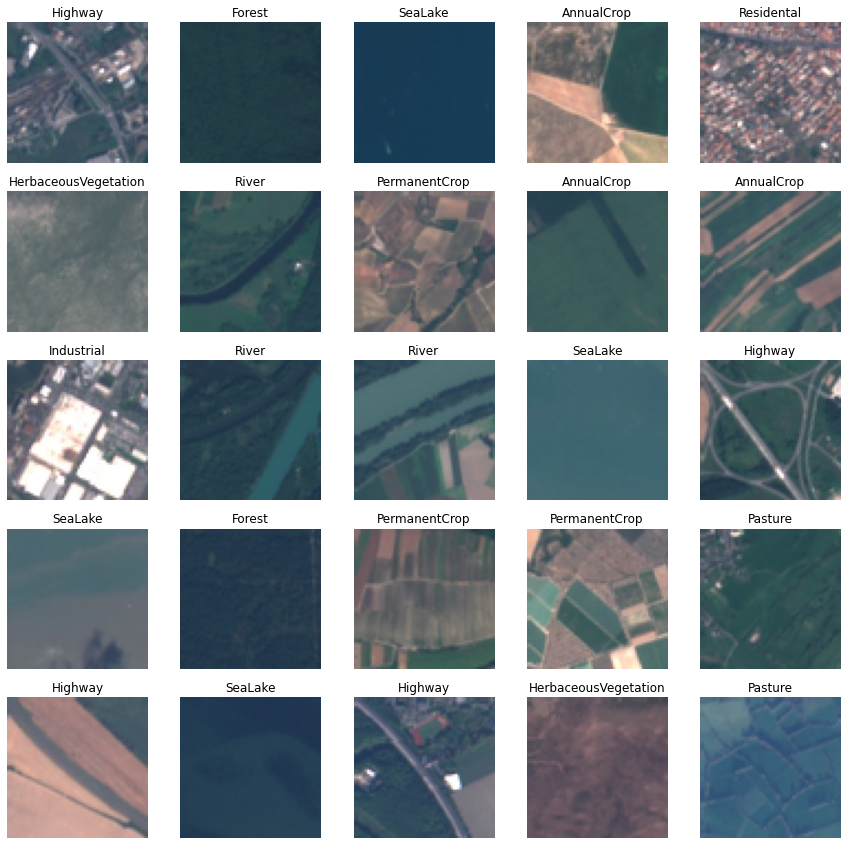

In [5]:
labels_map = {
    0: "AnnualCrop",
    1: "Forest",
    2: "HerbaceousVegetation",
    3: "Highway",
    4: "Industrial",
    5: "Pasture",
    6: "PermanentCrop",
    7: "Residental",
    8: "River",
    9: "SeaLake",
}

figure = plt.figure(figsize=(15, 15))

cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(sat_data), size=(1,)).item()

    img, label = sat_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze().permute(1, 2, 0))
plt.show()

# 2. Train Test Split
- Train : 80% & Test : 20%

In [6]:
torch.manual_seed(1007)

In [7]:
train_size = int(len(sat_data)*0.8)
test_size = len(sat_data) - train_size

In [8]:
train_set, test_set = random_split(sat_data, [train_size, test_size])

In [9]:
train_set[0]

(tensor([[[0.6549, 0.6549, 0.6588,  ..., 0.2863, 0.4588, 0.4863],
          [0.6471, 0.6549, 0.6627,  ..., 0.2980, 0.4588, 0.4784],
          [0.6471, 0.6549, 0.6863,  ..., 0.3176, 0.4510, 0.4941],
          ...,
          [0.6078, 0.6275, 0.7176,  ..., 0.7255, 0.8392, 0.8549],
          [0.8980, 0.9098, 0.9765,  ..., 0.5412, 0.6471, 0.7255],
          [1.0000, 1.0000, 1.0000,  ..., 0.6431, 0.6235, 0.6000]],
 
         [[0.5451, 0.5490, 0.5529,  ..., 0.3294, 0.4549, 0.4431],
          [0.5569, 0.5529, 0.5529,  ..., 0.3255, 0.4549, 0.4471],
          [0.5765, 0.5647, 0.5804,  ..., 0.3451, 0.4627, 0.4863],
          ...,
          [0.6000, 0.5922, 0.6588,  ..., 0.6157, 0.7137, 0.7490],
          [0.8078, 0.8039, 0.8588,  ..., 0.4706, 0.5647, 0.6588],
          [0.8588, 0.8627, 0.8706,  ..., 0.5961, 0.5647, 0.5529]],
 
         [[0.6039, 0.6157, 0.6118,  ..., 0.4000, 0.5255, 0.5059],
          [0.5882, 0.5961, 0.6000,  ..., 0.3961, 0.5176, 0.4980],
          [0.5765, 0.5882, 0.6157,  ...,

In [10]:
train_dataloader = DataLoader(train_set, batch_size=128, shuffle=True)
test_dataloader = DataLoader(test_set, batch_size=len(test_set), shuffle=True)

# 3. Modeling
총 3가지 모델 구성
1. 얕은 모델 <br>
2. 레이어 조금 추가한 모델 <br>
3. 더 두꺼운 모델


In [30]:
from torch._C import FileCheck
class my_Model_1(nn.Module):
  def __init__(self):
    super(my_Model_1, self).__init__()
    # Input : 64*64*3
    self.model = nn.Sequential(
        nn.Conv2d(3, 16, kernel_size = 3, stride=1, padding=1, padding_mode='zeros'), # 64*64*16
        nn.BatchNorm2d(16),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2), # 32*32*16

        nn.Conv2d(16, 32, kernel_size = 3, stride=1, padding=1, padding_mode='zeros'),  # 32*32*32
        nn.BatchNorm2d(32),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),  # 16*16*64

        nn.Conv2d(32, 64, kernel_size = 3, stride=1, padding=1, padding_mode='zeros'),  # 16*16*64
        nn.BatchNorm2d(64),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2), # 8*8*64

        nn.Conv2d(64, 128, kernel_size = 3, stride=1, padding=1, padding_mode='zeros'),  # 8*8*128
        nn.BatchNorm2d(128),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2), # 4*4*128

        nn.Flatten(),  # 4*4*256
        nn.Linear(2048,512),
        nn.Linear(512,256),
        nn.Linear(256,10)
    )


  def forward(self, x):
    in_size = x.size(0)
    output = self.model(x)
    return F.log_softmax(output, dim=1)

In [31]:
from torch._C import FileCheck
class my_Model_2(nn.Module):
  def __init__(self):
    super(my_Model_2, self).__init__()
    # Input : 64*64*3
    self.model = nn.Sequential(
        nn.Conv2d(3, 16, kernel_size = 3, stride=1, padding=1, padding_mode='zeros'), # 64*64*16
        nn.BatchNorm2d(16),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2), # 32*32*16

        nn.Conv2d(16, 32, kernel_size = 3, stride=1, padding=1, padding_mode='zeros'),  # 32*32*32
        nn.ReLU(),
        nn.Conv2d(32, 32, kernel_size = 3, stride=1, padding=1, padding_mode='zeros'),  # 32*32*32
        nn.BatchNorm2d(32),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),  # 16*16*32

        nn.Conv2d(32, 64, kernel_size = 3, stride=1, padding=1, padding_mode='zeros'),  # 16*16*64
        nn.ReLU(),
        nn.Conv2d(64, 64, kernel_size = 3, stride=1, padding=1, padding_mode='zeros'),  # 16*16*64
        nn.BatchNorm2d(64),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2), #8*8*64

        nn.Flatten(), 
        nn.Linear(4096,512),
        nn.Linear(512,256),
        nn.Linear(256,10)
    )


  def forward(self, x):
    in_size = x.size(0)
    output = self.model(x)
    return F.log_softmax(output, dim=1)

In [32]:
from torch._C import FileCheck
class my_Model_3(nn.Module):
  def __init__(self):
    super(my_Model_3, self).__init__()
    # Input : 64*64*3
    self.model = nn.Sequential(
        nn.Conv2d(3, 16, kernel_size = 3, stride=1, padding=1, padding_mode='zeros'), # 64*64*16
        nn.BatchNorm2d(16),
        nn.ReLU(),
        nn.Dropout(p=0.3),
        nn.MaxPool2d(kernel_size=2, stride=2), # 32*32*16


        nn.Conv2d(16, 32, kernel_size = 3, stride=1, padding=1, padding_mode='zeros'),  # 32*32*32
        nn.ReLU(),
        nn.Conv2d(32, 64, kernel_size = 3, stride=1, padding=1, padding_mode='zeros'),  # 32*32*64
        nn.BatchNorm2d(64),
        nn.ReLU(),
        nn.Dropout(p=0.3),
        nn.MaxPool2d(kernel_size=2, stride=2),  # 16*16*64

        nn.Conv2d(64, 128, kernel_size = 3, stride=1, padding=1, padding_mode='zeros'),  # 16*16*64
        nn.ReLU(),
        nn.Conv2d(128, 128, kernel_size = 3, stride=1, padding=1, padding_mode='zeros'),  # 16*16*128
        nn.BatchNorm2d(128),
        nn.ReLU(),
        nn.Dropout(p=0.3),
        nn.MaxPool2d(kernel_size=2, stride=2), #8*8*64

        nn.Conv2d(128, 256, kernel_size = 3, stride=1, padding=1, padding_mode='zeros'),  #8*8*256
        nn.ReLU(),
        nn.Conv2d(256, 256, kernel_size = 3, stride=1, padding=1, padding_mode='zeros'),  #8*8*256
        nn.BatchNorm2d(256),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2), #4*4*256
        nn.Dropout(p=0.3),

        nn.Conv2d(256, 512, kernel_size = 3, stride=1, padding=1, padding_mode='zeros'),  #4*4*512
        nn.ReLU(),
        nn.Conv2d(512, 512, kernel_size = 3, stride=1, padding=1, padding_mode='zeros'),  #4*4*512
        nn.BatchNorm2d(512),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2), # 2*2*512
        nn.Dropout(p=0.3),

        nn.Flatten(),  
        nn.Linear(2048,512),
        nn.Linear(512,256),
        nn.Linear(256, 10)
    )


  def forward(self, x):
    in_size = x.size(0)
    x = x.to(device)
    output = self.model(x)
    return F.log_softmax(output, dim=1)

In [33]:
## 여러 optimization 방법 사용
def get_optim(model, optim, lr):
  if optim == "sgd":
    use_optimizer = torch.optim.SGD(params=model.parameters(), lr=lr)
  elif optim == "adam":
    use_optimizer = torch.optim.Adam(params=model.parameters(), lr=lr)
  elif optim == 'adagrad':
    use_optimizer = torch.optim.Adagrad(params=model.parameters(), lr=lr)
  elif optim == 'rmsprop':
    use_optimizer = torch.optim.RMSprop(params=model.parameters(), lr=lr)
  else:
    print('잘못 입력 함')  

  return use_optimizer    

## 저번 과제 참조 : train loss 저장 후 시각화
train_history=[]
def train(epoch, model, opt, lr):
  train_loss = []
  model.train()
  optimizer = get_optim(model, opt, lr)
  print("===== Start Train =====")
  for ep in range(epoch):
    for batch_idx, (data, target) in enumerate(train_dataloader):
      data, target = Variable(data).to(device), Variable(target).to(device)
    
      optimizer.zero_grad()

      output = model(data)
      loss = F.nll_loss(output, target)
      loss.backward()
      optimizer.step()

      if batch_idx % 40 == 0:
        print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
            ep, batch_idx * len(data), len(train_dataloader.dataset),
            100. * batch_idx / len(train_dataloader), loss.item()))
        
    train_loss.append(loss)
     

  history = {}
  history['model'] = model
  history['optimizer'] = opt
  history['lr'] = lr
  history['loss'] = train_loss

  train_history.append(history)


def test(model):
    model.eval()
    test_loss = 0
    correct = 0
    print("===== Start Test =====")
    with torch.no_grad():  #torch.no_grad() 추가
      for data, target in test_dataloader:
          data, target = Variable(data).to(device), Variable(target).to(device)
          output = model(data)
          test_loss += F.nll_loss(output, target, size_average=False).data      # nll_loss?? / cross entropy loss와의 관계 확인!
          pred = output.data.max(1, keepdim=True)[1]
          correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_dataloader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
          test_loss, correct, len(test_dataloader.dataset),
          100. * correct / len(test_dataloader.dataset)))
    
    return test_loss.cpu().numpy(), correct.cpu().numpy()

In [34]:
def init_weights(layer):
    if isinstance(layer, nn.Linear):
        torch.nn.init.xavier_uniform_(layer.weight)
        layer.bias.data.fill_(0.01)

In [35]:
str(my_Model_1)[-12:-2]

'my_Model_1'

In [36]:
# model 3가지 X learning rate 3가지 X optimization 4가지 : 총 36 경우 
my_model = [my_Model_1, my_Model_2, my_Model_3]
lr = [0.01, 0.005, 0.001]
optim = ['sgd','adam','adagrad','rmsprop']


for mo in my_model:
  for o in optim:
    for l in lr:
      use_model = mo().to(device)
      use_model.apply(init_weights)
      print(f'Train with model : {str(mo)[-12:-2]}, optimizer : {o}, learning rate : {l} ')

      train(10, use_model, o, l)
      test(use_model)

Train with model : my_Model_1, optimizer : sgd, learning rate : 0.01 
===== Start Train =====
Train Epoch: 0 [0/21600 (0%)]	Loss: 3.515768
Train Epoch: 0 [5120/21600 (24%)]	Loss: 0.931534
Train Epoch: 0 [10240/21600 (47%)]	Loss: 0.892683
Train Epoch: 0 [15360/21600 (71%)]	Loss: 0.790379
Train Epoch: 0 [20480/21600 (95%)]	Loss: 0.817967
Train Epoch: 1 [0/21600 (0%)]	Loss: 0.652986
Train Epoch: 1 [5120/21600 (24%)]	Loss: 0.830580
Train Epoch: 1 [10240/21600 (47%)]	Loss: 0.750202
Train Epoch: 1 [15360/21600 (71%)]	Loss: 0.622753
Train Epoch: 1 [20480/21600 (95%)]	Loss: 0.460467
Train Epoch: 2 [0/21600 (0%)]	Loss: 0.543205
Train Epoch: 2 [5120/21600 (24%)]	Loss: 0.537349
Train Epoch: 2 [10240/21600 (47%)]	Loss: 0.498439
Train Epoch: 2 [15360/21600 (71%)]	Loss: 0.620522
Train Epoch: 2 [20480/21600 (95%)]	Loss: 0.904738
Train Epoch: 3 [0/21600 (0%)]	Loss: 0.533056
Train Epoch: 3 [5120/21600 (24%)]	Loss: 0.505576
Train Epoch: 3 [10240/21600 (47%)]	Loss: 0.584206
Train Epoch: 3 [15360/21600 (7

/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Average loss: 0.8035, Accuracy: 4127/5400 (76%)

===== Start Test =====

Test set: Average loss: 0.8035, Accuracy: 4127/5400 (76%)

===== Start Test =====

Test set: Average loss: 0.8035, Accuracy: 4127/5400 (76%)

Train with model : my_Model_1, optimizer : sgd, learning rate : 0.005 
===== Start Train =====
Train Epoch: 0 [0/21600 (0%)]	Loss: 4.182880
Train Epoch: 0 [5120/21600 (24%)]	Loss: 1.203244
Train Epoch: 0 [10240/21600 (47%)]	Loss: 0.929644
Train Epoch: 0 [15360/21600 (71%)]	Loss: 0.801670
Train Epoch: 0 [20480/21600 (95%)]	Loss: 0.753684
Train Epoch: 1 [0/21600 (0%)]	Loss: 0.795680
Train Epoch: 1 [5120/21600 (24%)]	Loss: 0.621197
Train Epoch: 1 [10240/21600 (47%)]	Loss: 0.982259
Train Epoch: 1 [15360/21600 (71%)]	Loss: 0.692727
Train Epoch: 1 [20480/21600 (95%)]	Loss: 0.614780
Train Epoch: 2 [0/21600 (0%)]	Loss: 0.569435
Train Epoch: 2 [5120/21600 (24%)]	Loss: 0.630453
Train Epoch: 2 [10240/21600 (47%)]	Loss: 0.577011
Train Epoch: 2 [15360/21600 (71%)]	Loss: 0.6173

In [38]:
len(train_history)

36

In [42]:
train_history[0]

{'loss': [tensor(0.7782, device='cuda:0', grad_fn=<NllLossBackward0>),
  tensor(0.6292, device='cuda:0', grad_fn=<NllLossBackward0>),
  tensor(0.4953, device='cuda:0', grad_fn=<NllLossBackward0>),
  tensor(0.4737, device='cuda:0', grad_fn=<NllLossBackward0>),
  tensor(0.4673, device='cuda:0', grad_fn=<NllLossBackward0>),
  tensor(0.3938, device='cuda:0', grad_fn=<NllLossBackward0>),
  tensor(0.4204, device='cuda:0', grad_fn=<NllLossBackward0>),
  tensor(0.1735, device='cuda:0', grad_fn=<NllLossBackward0>),
  tensor(0.3265, device='cuda:0', grad_fn=<NllLossBackward0>),
  tensor(0.2566, device='cuda:0', grad_fn=<NllLossBackward0>)],
 'lr': 0.01,
 'model': my_Model_1(
   (model): Sequential(
     (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (2): ReLU()
     (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
     (4): Conv2d(16, 32, kernel_siz

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [53]:
def plot_all(train_history):
  fig = plt.figure(figsize=(20,60))
  l = int(len(train_history))
  for i in range(1,len(train_history)+1):
    history = train_history[i-1]

    model = history['model']
    optim = history['optimizer']
    lr = history['lr']
    loss_list = []
    loss = history['loss']
    for l in loss:
      loss_list.append(l.cpu().detach().numpy())

    ax = fig.add_subplot(12, 3, i)
    ax.plot(loss_list, color="blue", label="train loss")
    if i <= 12:
      ax.set_title(f'Model1, {optim}, {lr}')
    elif i<=24:
      ax.set_title(f'Model2, {optim}, {lr}')
    else:
      ax.set_title(f'Model3, {optim}, {lr}')
    ax.legend()
  
  fig.show()
  fig.savefig('/content/drive/MyDrive/Colab_Notebooks/KUBIG 22-2 방학 딥러닝 세션/4차과제_history.png')

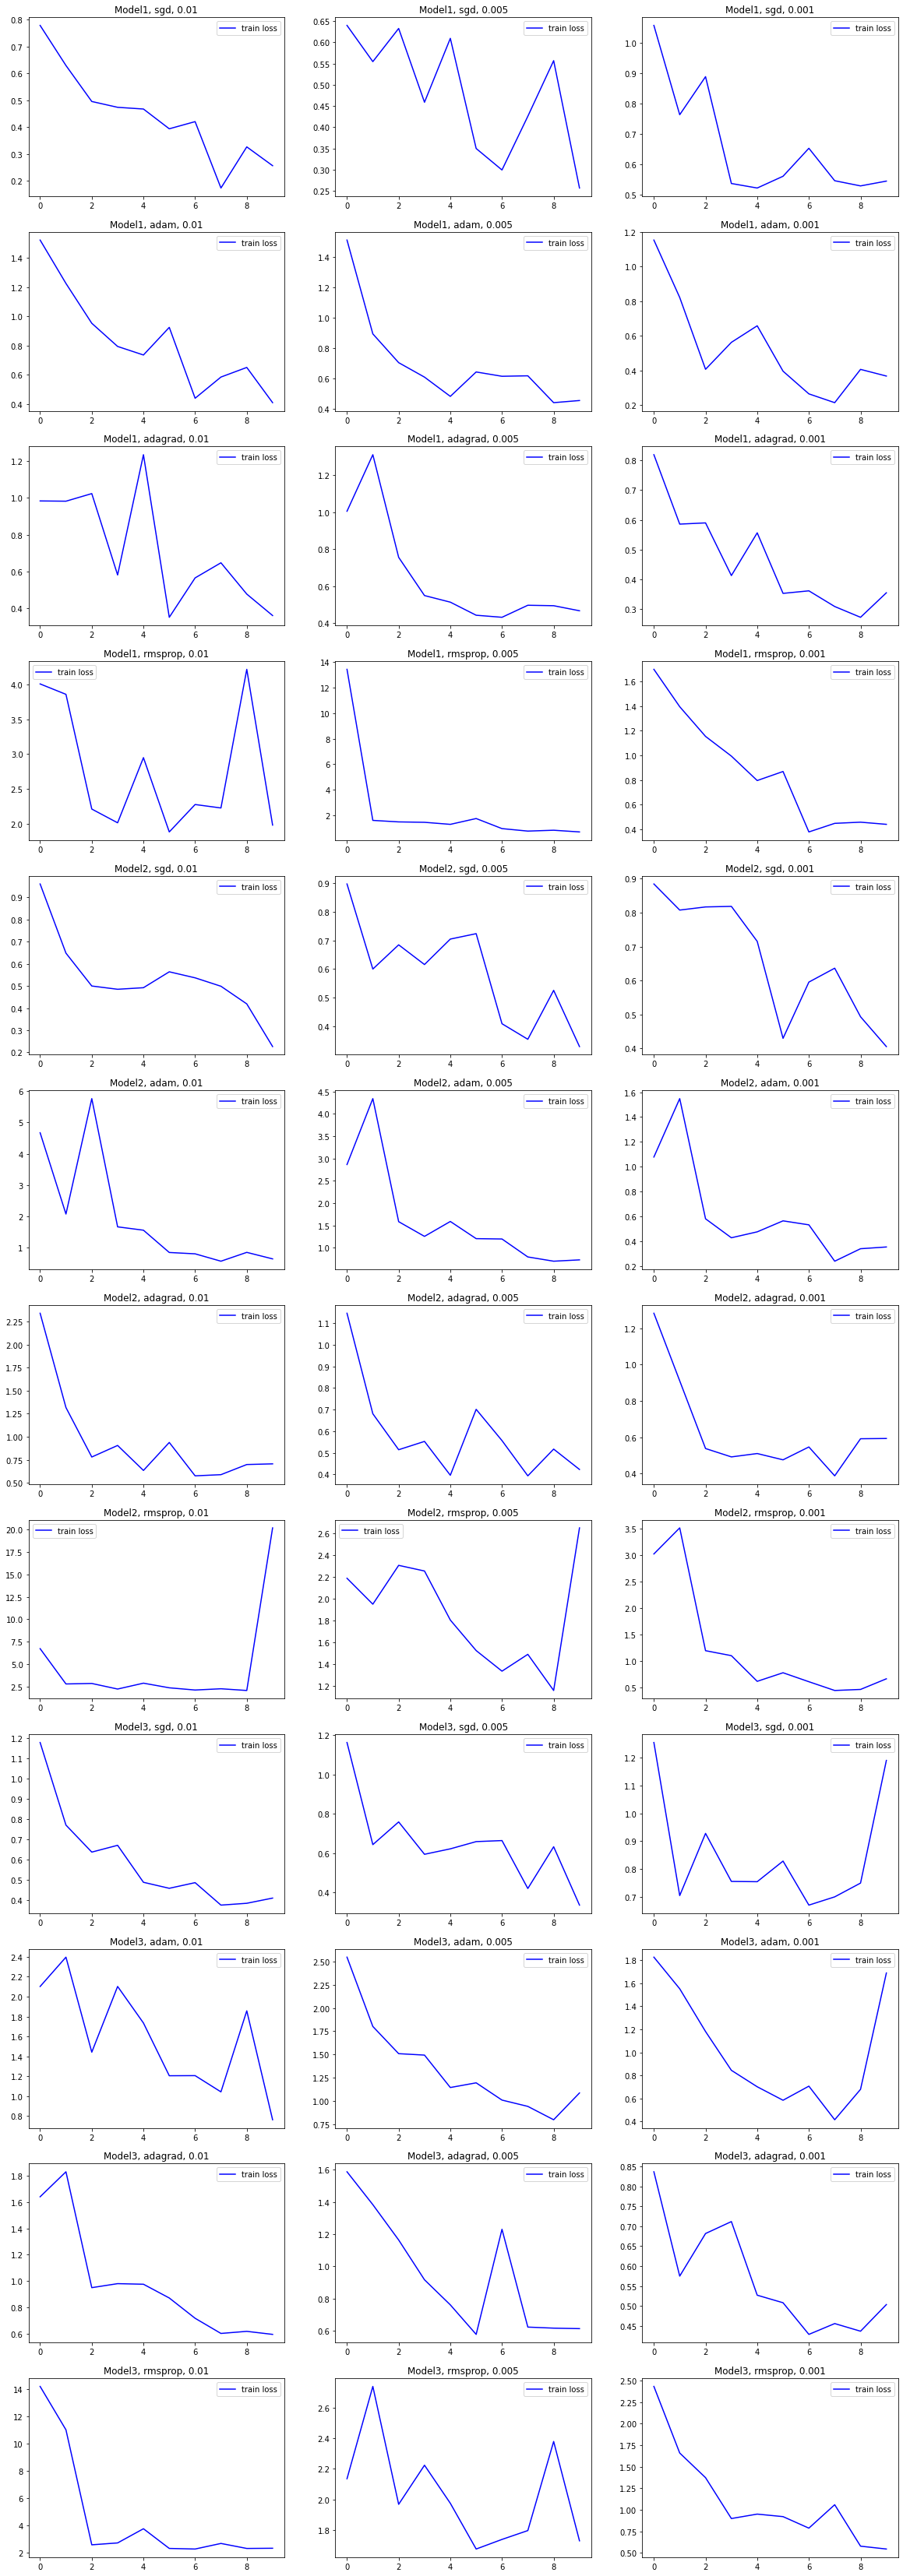

In [54]:
plot_all(train_history)